In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings


In [2]:
fetal_health = pd.read_csv("fetal_health.csv")

In [3]:
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
fetal_health.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
fetal_health.iloc[708]

baseline value                                            130.000
accelerations                                               0.000
fetal_movement                                              0.000
uterine_contractions                                        0.007
light_decelerations                                         0.000
severe_decelerations                                        0.000
prolongued_decelerations                                    0.000
abnormal_short_term_variability                            55.000
mean_value_of_short_term_variability                        0.500
percentage_of_time_with_abnormal_long_term_variability     11.000
mean_value_of_long_term_variability                         7.600
histogram_width                                            20.000
histogram_min                                             124.000
histogram_max                                             144.000
histogram_number_of_peaks                                   1.000
histogram_

In [7]:
fetal_health.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<AxesSubplot:>

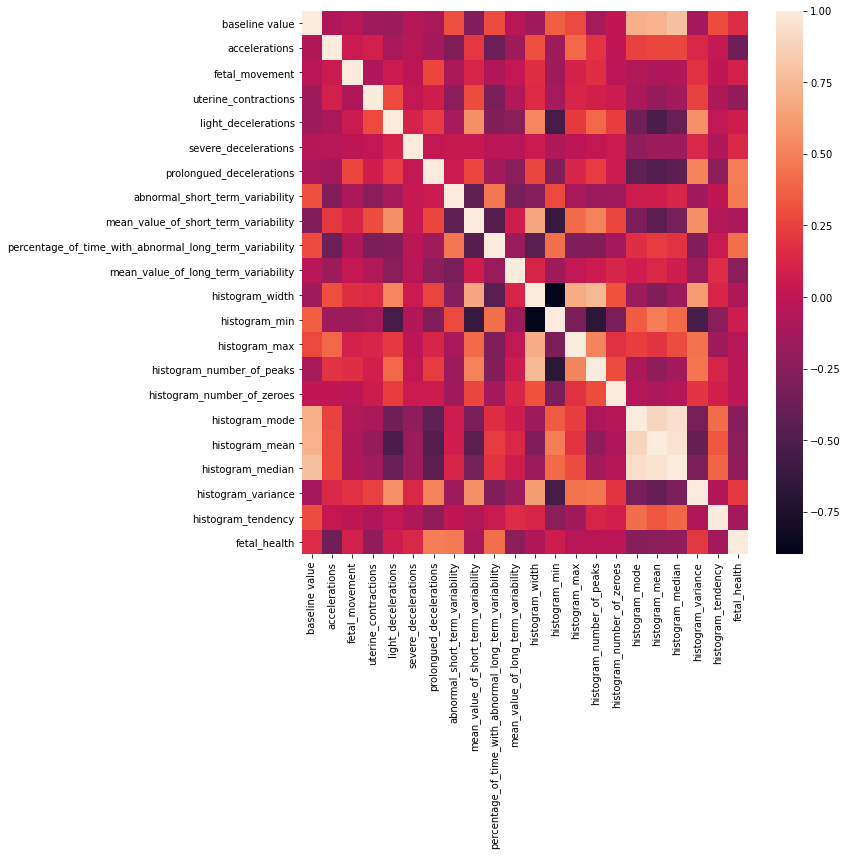

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(fetal_health.corr())


In [9]:
fetal_health['fetal_health'] = fetal_health['fetal_health'].replace({1:"Normal",2:"Suspect", 3:"Pathological"})

In [10]:
fetal_health['fetal_health'].value_counts()#/len(fetal_health['fetal_health'])

Normal          1655
Suspect          295
Pathological     176
Name: fetal_health, dtype: int64

In [ ]:
##########################################
# pair plot some features with targer as hue


In [13]:
start_col = 15
end_col = 20
curr_df = pd.concat([fetal_health.iloc[:,start_col:end_col], fetal_health['fetal_health']], axis =1)

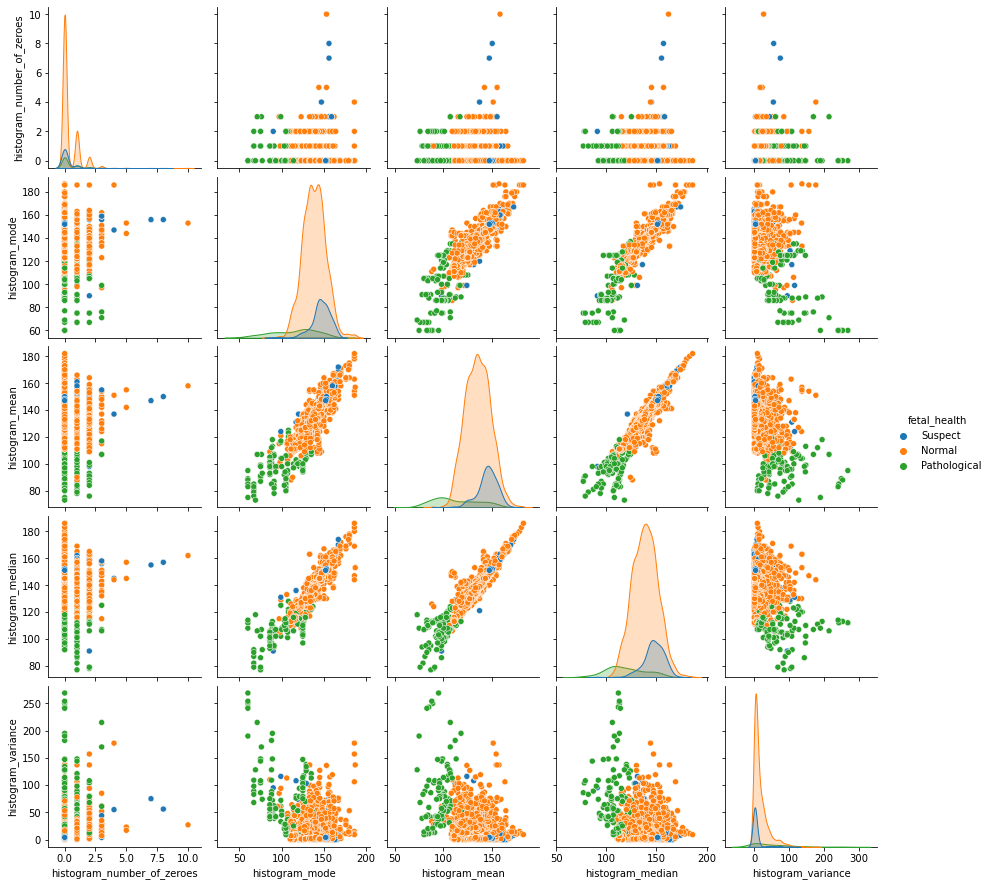

In [15]:
sns.pairplot(data=curr_df,hue='fetal_health')

In [ ]:
###################################

In [16]:
X = fetal_health.iloc[:,:-1]
y = fetal_health.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 47)

In [19]:
y_train.value_counts()

Normal          1158
Suspect          203
Pathological     127
Name: fetal_health, dtype: int64

In [ ]:
###################################################
# Scale the features to standard scaler, so we could use them easily with as much algo as possible

In [ ]:
from sklearn.preprocessing import

In [ ]:
#############################################################

In [ ]:
# TRY AT HOME DIFFERENT ALGOS...

In [ ]:
#  RANDOM FOREST TRY, without grid search

In [ ]:
import sklearn.ensemble as se

In [ ]:
cl_random_forest_before_grid = se.RandomForestClassifier()

In [ ]:
cl_random_forest_before_grid.fit(X_train_transformed ,y_train)


In [ ]:
y_pred_random_forest_before_grid = cl_random_forest_before_grid.predict(X_train_transformed )
print(classification_report(y_true= y_train, y_pred=y_pred_random_forest_before_grid))


In [ ]:
y_test_random_forest_before_grid = cl_random_forest_before_grid.predict(X_test_transformed )
print(classification_report(y_true= y_test, y_pred=y_test_random_forest_before_grid))


In [ ]:
cl_random_forest_before_grid.score(X_test_transformed ,y_test)

In [ ]:
# RANDOM SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None) #the default
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid)
  




In [ ]:
cl_random_forest_grid = se.RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = cl_random_forest_grid , 
                               param_distributions = random_grid,
                               n_iter = 100,  #how many fits, tradeoff!!
                               cv = 3, 
                               verbose=2, 
                               random_state=47, 
                               n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(X_train_transformed, y_train)

In [ ]:
##############################################